In [6]:
import  numpy  as  np


def  rrcosfilter ( N ,  beta ,  Ts ,  Fs ):
    """
    Creates a root-raised cosine filter that is symmetrical about the center
    runs.
    Parameter:
    -----------
    N : int
        Number of filter points.
    beta : float
        Roll-off factor in the interval [0, 1].
    Ts : float
        The symbol period (inverse of the symbol rate) in seconds.
    Fs : float
        The sample rate in Hertz.
    Return:
    -----------
    h_rcc : numpy.ndarray
        The impulse response of the filter as a NumPy array.
    """

    T_delta  =  1 / float ( Fs )
    sample_num  =  np . arange ( N )
    h_rrc  =  np . zeros ( N ,  dtype = float )

    for  x  in  sample_num :
        t  =  ( x - N / 2 ) * T_delta
        if  t  ==  0.0 :
            scaling  =  1 / np . sqrt ( Ts )
            equation  =  1 - beta + ( 4 * beta / np . pi )
            h_rrc [ x ]  =  scaling  *  equation
        elif  beta  !=  0  and  t  ==  ( Ts / ( 4 * beta )  or  - Ts / ( 4 * beta )):
            scaling  =  beta / np . sqrt ( 2 * Ts )
            equation  =  ( 1 + ( 2 / np . pi )) * np . sin ( np . pi / ( 4 * beta ))  +  ( 1 - 2 / np . pi ) * np . cos ( np.pi / ( 4 * beta ) ) 
            h_rrc [ x ]  =  scaling  *  equation
        else :
            scaling  =  1 / np . sqrt ( Ts )
            numerator  =  np . sin ( np . pi * ( 1 - beta ) * t / Ts )  +  ( 4 * beta * t / Ts ) * np . cos ( np . pi * ( 1 + beta ) * t / Ts )
            denominator  =  ( np . pi * t / Ts ) * ( 1 - np . square ( 4 * beta * t / Ts ))
            equation  =  numerator  /  denominator
            h_rrc [ x ]  =  scaling  *  equation
    return  h_rrc



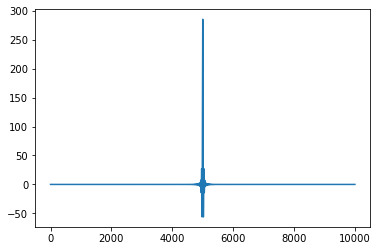

In [11]:
import matplotlib.pyplot as plt
sample_rrc  =  rrcosfilter (10000,0.22, 1.38e-5, 1152000)
plt.plot(sample_rrc)